In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib
from math import log
import sklearn as sl
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from IPython.display import HTML, display
import seaborn as sns

def ps(obj):
    print(obj)
    print('-'*10)
    
ps('numpy version: '+np.__version__)
ps('pandas version: '+pd.__version__)
ps('matplotlib version: '+matplotlib.__version__)
ps('sklearn version: '+sl.__version__)
'''
My Version:
numpy version: 1.14.0
----------
pandas version: 0.21.0
----------
matplotlib version: 2.1.0
----------
sklearn version: 0.19.1
----------
'''

numpy version: 1.14.0
----------
pandas version: 0.21.0
----------
matplotlib version: 2.1.0
----------
sklearn version: 0.19.1
----------


'\nMy Version:\nnumpy version: 1.14.0\n----------\npandas version: 0.21.0\n----------\nmatplotlib version: 2.1.0\n----------\nsklearn version: 0.19.1\n----------\n'

<center>
    
# The prediction of Gas Isotherms by the Structures of Adsorbents
##### Group 6: Wenqin You, Zhe Liu

<center>

## Introduction:

Adsorptive separation is essential in the chemical industry, for example, the separation of natural gas by pressure swing adsorption technique.<cite data-cite="doi:10.1039/B802426J">[1]</cite><cite data-cite="doi:10.1016/j.apenergy.2016.06.146">[2]</cite>. For adsorption-based gas separation, Metal-organic frameworks (MOFs) are promising candidates as adsorbents due to their large surface areas, adjustable pore sizes, and controllable properties.<cite data-cite="doi:10.1021/cr300014x">[3]</cite> The grand canonical Monte Carlo (GCMC) simulation was always used to calculate the adsorption isotherms of MOFs for separation.

The search for an optimal MOF for a particular adsorbate requires a large scale screening of MOF structures. Although GCMC simulation is a practical approach to perform high-throughput screening of hypothetical MOFs, such a molecular simulation is too computationally expensive because of the vast number of possible MOF structures. It will be meaningful and energy-saving to predict the gas isotherms by the analysis of the structures of adsorbents without performing an experiment or running a GCMC simulation. 

Several research groups developed various approaches related to machine learning techniques to explore the relationship between structural properties of hypothetical adsorbents and their adsorption performance. Fernandez et al. developed the regression model to predict carbon dioxide and nitrogen uptake by using radial distribution function cooperated with principal component analysis.<cite data-cite="doi:10.1021/jp404287t">[4]</cite> Furthermore, Fernandez et al. predicted methane uptake by using structure variables, such as void fraction and pore size.<cite data-cite="doi:10.1021/acscombsci.5b00188">[5]</cite> In the meantime, Sezginel et al. built several multivariable linear models of structural parameters, such as surface area, crystal density, and pore diameter, to predict methane uptake by analyzing 45 MOFs.<cite data-cite="doi:10.1016/j.ces.2014.10.034">[6]</cite> The most recent research conducted by Pardakhti et al. used both structural and chemical descriptors to model methane adsorption of MOFs by applied various machine learning methods, including decision tree (DT) algorithm, Poisson regression, support vector machine (SVM), and random forest (RF).<cite data-cite="doi:10.1021/acscombsci.7b00056">[7]</cite> Figure 1 shows their results. All these previous works suggest that machine learning approaches are helpful to extract the complicated relationship between MOFs structure and adsorption and yield accurate prediction.
<center>
<img src="Images/Figure_1.png" width="800">
</center>

## Workflow:
The project analyzes two databases, NIST adsorption database and CoRE MOF database. Therefore, the data analysis workflow is separated into two streams, NIST and CoRE. The Figure 2. shows the schematic workflow.
<center>
<img src="Images/workflow.png" width="1000">
    Figure 2. Schematic Workflow
</center>

In the NIST stream, the first step is data cleansing. The NIST adsorption database contains not only MOFs but also includes other non-MOF adsorbents, such as zeolites, active carbon, and etc. Since the project only focus on MOFs, we must exclude those non-MOF adsorbents to reduce the size of database and to save the computational time. The method is to pick several keywords based on the observation of database and to write a function to filter out the non-MOF materials as much as we can. In addition, we select approximate 124 "popular" MOFs in the CoRE MOF database. Each of them has its common name which can be easy to find in the NIST database. The basic concept can be illustrated as Figure 3.
<center>
<img src="Images/data_cleaning.png" width="500">
    Figure 3. Data Cleasning Concept of NIST Database
</center>

The second step is to extract isotherm data from the NIST database and to preform linear regression. In this step, we only consider two isotherm models, which are Langmuir and Freundlich isotherm. The Langmuir adsorption model explains adsorption by assuming an adsorbate behaves as an ideal gas at isothermal conditions. The adsorbent is assumed to be an ideal solid surface composed of series of distinct sites capable of binding the adsorbate. The following equation describes the Langmuir isotherm model.
\begin{equation*}
q_e =\frac{Q_0bC_e} {1+bC_e}
\end{equation*}
where $q_{e}$ is amount of adsorbate in the adsorbent at equilibrium, $Q_{0}$ is maximum monolayer coverage capacities, b is Langmuir isotherm constant, $C_{e}$ is equilibrium concentration.

The Freundlich isotherm is the most important multisite adsorption isotherm for rough surfaces. The following equation describes the Freundlich isotherm model.
\begin{equation*}
q_e = KC_e^{\frac{1} {n}}
\end{equation*}
where K is Freundlich isotherm constant related to adsorption capacity. 

We will use both models to fit the isotherm data and compute the $R^{2}$. One of the model with higher $R^{2}$ will be assigned to the adsorbent. This is the isotherm classification step. We will label each isotherm and its corresponding adsorbent as one of isotherm models and calculate the parameters related to this model. We will also record the units for unit conversion in future.

In the CoRE MOF stream, similarly, the first step is data cleansing. We will eliminate the missing data. Fortunately, the CoRE MOFs database is well-organized and ready to be analyzed. The CoRE MOF database includes seven structure properties. Since these structure properties could be correlated, we will perform the principle component analysis to explore the correlation between variables and reduce dimensionality. In addition, Besides numerical variables, CoRE also includes categorical variable, metal type. We will convert metal type to numerical value, assign each metal a integer number or calculate percent weight of metal in MOF.

Finally, two data analysis streams will be combined by linking two database based on MOFs. We will implement different machine learning techniques to establish regression model to predict isotherm based on structure preporties.

## Date Retrieval and Storage:

### CoRE MOF Database:

CoRE MOF Database is restored an Excel file saved under the local directory. The following code is used to retrieve the useful data from the Excel file and have three main purposes:
* Mark the missing value as `NaN` instead of the orgianl value zero.
* For each MOF containing multiple types of metal, duplicate the row and breakdown it to multiple rows with a single metal under `Metal Type` column. 
* Save the data as `.csv` file.

**Note**: `pandas.read_excel` parameter `sheet_name` or `sheetname` may not work for pandas version 0.22.0.

In [2]:
# Mark the missing value as NaN instead of the orgianl value zero
def one2NaN(a):
    if a == 0:
        return np.NaN
    else:
        return a

# For each MOF containing multiple types of metal, duplicate the row and breakdown 
# it to multiple rows with a single metal under Metal Type column
def metal_split(df):
    df_new = pd.DataFrame()
    metal = df.iloc[0, :]['Metal Type'].split(', ')
    for index, value in enumerate(metal):
        df_new = df_new.append(df)
        df_new.iloc[index, 1] = value
    return df_new

# Read the structure information from the CoRE MOF database
def CoRE_Read(filename):
    dict_one2NaN = {'Density (g/cm3)':one2NaN, 'PLD':one2NaN, 'LCD':one2NaN, 'VSA  (m2/cm3)':one2NaN, 'GSA (m2/g)':one2NaN,
        'Void Fraction':one2NaN, 'pore volume (cm3/g)':one2NaN}
    df_main = pd.read_excel(filename, sheet_name='Table_S1', header=8, usecols=range(10), converters=dict_one2NaN)
    df_main = df_main.reset_index(drop=True)
    CoRE = pd.DataFrame()
    for index in df_main.index:
        df_temp = metal_split(df_main.loc[[index]])
        CoRE = CoRE.append(df_temp, ignore_index=True)
    df_name = pd.read_excel(filename, sheet_name="Table_S12", header=2, usecols=range(2))
    CoRE_full = CoRE.merge(df_name, left_on='CSD REF. CODE', right_on='CSD REF. CODE', how='outer')
    CoRE_CM = CoRE.merge(df_name, left_on='CSD REF. CODE', right_on='CSD REF. CODE', how='inner')
    mask_full = np.all([ ~np.isnan(CoRE_full.loc[:, label]) for label in CoRE_CM.columns[2:-1]], axis=0)
    mask_CM = np.all([ ~np.isnan(CoRE_CM.loc[:, label]) for label in CoRE_CM.columns[2:-1]], axis=0)
    CoRE_full = CoRE_full.loc[mask_full, CoRE_full.columns].reset_index(drop=True)
    CoRE_CM = CoRE_CM.loc[mask_CM, CoRE_CM.columns].reset_index(drop=True)
    return CoRE_full, df_name, CoRE_CM

# Metal type is categorical variable. We convert it into numerical value. 
# Each metal is represented by their atomic mass, electronegativity, and atomic radius. 
# Electronegativity is the power of an atom when in a molecule to attract eletrons to itself.
def metal2properties(filename):
    CoRE = pd.read_csv(filename)
    metal_properties = pd.read_csv('Data/metal.csv')
    CoRE = CoRE.merge(metal_properties, left_on='Metal Type', right_on='Metal', how='inner')
    CoRE = CoRE.sort_values(by=['CSD REF. CODE']).reset_index(drop=True)
    CoRE = CoRE.loc[:, ['CSD REF. CODE', 'Atomic Mass', 'Electronegativity', 'Atomic Radius', 'Density (g/cm3)', 'PLD', 'LCD', 'VSA  (m2/cm3)', 'GSA (m2/g)', 'Void Fraction', 'pore volume (cm3/g)', 'Common Name']]
    CoRE.to_csv(filename, sep=',', index_label=False)
    return CoRE

In [3]:
filename = 'Data/CoRE_MOFs/cm502594j_si_002.xlsx'
CoRE_full, common_name, CoRE_CM = CoRE_Read(filename)
CoRE_full.to_csv('Data/CoRE_MOF.csv', sep=',', index_label=False)
common_name.to_csv('Data/common_name.csv', sep=',', index_label=False)
CoRE_CM.to_csv('Data/CoRE_MOF_CM.csv', sep=',', index_label=False)
CoRE_MOF_CM = metal2properties('Data/CoRE_MOF_CM.csv')
CoRE_MOF = metal2properties('Data/CoRE_MOF.csv')

### NIST Adsorption Database: 

#### Data Cleaning:

In [4]:
# This SRD205_isotherm class provides all the information we can obtain from the isotherm file. 
# Isotherm file is the most important file for us to explore with its filename.
# For example, it contains the isotherm data, units, temperature, adsorbent, and adsorbate.
class SRD205_isotherm:
    def __init__(self, filename):
        host='adsorption.nist.gov'
        URL = 'https://'+host+'/srd205/api/isotherm/'+filename+'.json'
        self.isotherm_JSON = json.loads(requests.get(URL).content) #dict
    def get_units(self):
        pressure_unit = self.isotherm_JSON["pressureUnits"]
        adsorption_unit = self.isotherm_JSON["adsorptionUnits"]
        return pressure_unit, adsorption_unit
    def get_data_lists(self):
        pressure_list = [ point["pressure"] for point in self.isotherm_JSON["isotherm_data"] ]
        adsorption_list = [ point["adsorption"] for point in self.isotherm_JSON["isotherm_data"] ]
        return pressure_list, adsorption_list
    def get_materials(self):
        adsorbent = self.isotherm_JSON["adsorbentMaterial"]
        adsorbate = self.isotherm_JSON["adsorbateGas"]
        return adsorbent, adsorbate
    def create_dataframe(self):
        self.pressure_label = "Pressure ("+self.pressure_unit+")"
        self.adsorption_label = "Loading ("+self.adsorption_unit+")"
        self.isotherm_data = pd.DataFrame({ self.pressure_label: self.pressure_list, 
                                            self.adsorption_label: self.adsorption_list })

# unit defines how to get adsorption units by request URL
def unit(filename):
    host='adsorption.nist.gov'
    URL = 'http://'+host+'/srd205/api/isotherm/'+filename+'.json'
    isotherm_JSON = json.loads(requests.get(URL).content)
    unit = isotherm_JSON["adsorptionUnits"]
    return unit

# We first download these four json files locally, then use json.load to read these information
def load_json_files():
    all_isotherms = json.loads(open('Data/NIST/isotherms.json').read())
    all_gases = json.loads(open('Data/NIST/gases.json').read())
    all_materials = json.loads(open('Data/NIST/materials.json').read())
    all_biblio = json.loads(open('Data/NIST/biblio.json').read())
    return all_isotherms, all_gases, all_materials, all_biblio

# The aim of filter_adsorbent function is to filter out the non-MOF adsorbents by keywords 
# based on the database observation
# This function can help us reduce the size of available adsorbents
def filter_adsorbent(isotherms, keywords):
    isotherms_filtered = []
    for index_isotherms in range(0, np.size(isotherms)):
        keyword_not_found = True
        for keyword in keywords:
            if not keyword_not_found:
                break
            if keyword in isotherms[index_isotherms]['adsorbentMaterial']:
                keyword_not_found = False
        if keyword_not_found:
            isotherms_filtered.append(isotherms[index_isotherms])
    return isotherms_filtered

# we want to obtain all the filenames based on the targeted species of gases
def get_filename(isotherms, gases):
    filename_dict_by_gases = {}
    for index_gases in range(0, np.size(gases)):
        filename_list = []
        for index_isotherms in range(0, np.size(isotherms)):
            if isotherms[index_isotherms]['adsorbateGas'] == gases[index_gases]:
                filename_list.append(isotherms[index_isotherms]['filename'])
            filename_dict_by_gases[gases[index_gases]] = filename_list
    return filename_dict_by_gases

The keywords include `Zeo`, `Carbo`, `Graph`, `Silic`, `Alumina`, `ZSM`, `Bit`, `Clay`, `CMS`, `CNT`, and `COF`. After data cleansing, data sets is reduced 15% in size.

In [5]:
all_isotherms, all_gases, all_materials, all_biblio = load_json_files()
selected_gases = ['Nitrogen', 'Oxygen', 'Hydrogen', 'Methane', 'Carbon Dioxide']
keywords = ['Zeo', 'Carbo', 'Graph', 'Silic', 'Alumina', 'ZSM', 'Bit', 'Clay', 'CMS', 'CNT', 'COF']
isotherms_filtered = filter_adsorbent(all_isotherms, keywords)
filename_dict_by_gases = get_filename(isotherms_filtered, selected_gases)

In [6]:
print('Number of Isotherms:')
for gas in selected_gases:
    ps('{} has {} qualfied isotherms'.format(gas, np.size(filename_dict_by_gases[gas])))

Number of Isotherms:
Nitrogen has 4555 qualfied isotherms
----------
Oxygen has 249 qualfied isotherms
----------
Hydrogen has 4093 qualfied isotherms
----------
Methane has 2598 qualfied isotherms
----------
Carbon Dioxide has 5407 qualfied isotherms
----------


#### Isotherm Regression and Model Assignment:

In NIST database, each isotherm file contains adsorption at each pressure. There is no isotherm type available in NIST, but we need it to predict the isotherm. So our first step is to label each isotherm dataset with its corresponding type. Here we use two common isotherm models to fit each isotherm by linear regression. The first model is the Langmuir adsorption. $Q_0$ and b are its parameters. $Q_0$ is the adsorption capacity, which can be related with the structure information; $b$ is the Langmuir constant, which can be related with the temperature or heat of adsorption. Another model is the Freundlich. This model is an empirical equation. It also has two parameters, $K$ and $n$. $K$ is the Freundlich constant related to the adsorption capacity and $n$ is just a constant. After doing the curve-fitting, we will assign each isotherm with its adsorption type based on the higher $R^2$ value. Finally, we will only keep the isotherm dataset with $R^2$ value higher than 0.95.

In [7]:
# Based on the adsorption information, we want to label each isotherm with its corresponding isotherm model.
# For simplicity, we use Langmuir and Freundlich model as examples to label isotherms. 
def isotherm_regression(pressure_list, adsorption_list, isotherm_models):
    lr = LinearRegression()
    score_list = []
    model_list = ['Langmuir', 'Freundlich']
    parameters_list = []
    for model in isotherm_models:
        x, y = model(pressure_list, adsorption_list)
        lr.fit(x, y)
        R2 = lr.score(x, y)
        intercept = lr.intercept_[0]
        coef = lr.coef_[0][0]
        parameters = [ intercept, coef ]
        score_list.append(R2)
        parameters_list.append(parameters)
    index = np.argmax(score_list)
    model = model_list[index]
    if model == 'Langmuir':
        parameters =[ 1/parameters_list[index][0], parameters_list[index][0]/parameters_list[index][1] ]
    elif model == 'Freundlich':
        parameters =[ np.exp(parameters_list[index][0]), 1/parameters_list[index][1] ]
    R2 = score_list[index]
    return parameters, model, R2

# Langmuir equation: qe = Q*b*P/(1+b*P). We use the linearized Langmuir function to fit the adsorption data.
def model_langmuir(pressure_list, adsorption_list):
    x = np.array([ 1/pressure for pressure in pressure_list ]).reshape(-1, 1)
    y = np.array([ 1/adsorption for adsorption in adsorption_list ]).reshape(-1, 1)
    return x, y

# Freundlich equation: qe = K*P^(1/n). We use the linearized Freundlich function to fit the adsorption data.
def model_Freundlich(pressure_list, adsorption_list):
    x = np.array([ log(pressure) for pressure in pressure_list]).reshape(-1, 1)
    y = np.array([ log(adsorption) for adsorption in adsorption_list]).reshape(-1, 1)
    return x, y

# Because we use 1/pressure above, zero pressure doesn't make sense. 
# We check the value of pressure and remove the zero pressure and zero adsorption datapoints.
def check(pressure_list, adsorption_list):
    pressure_array = np.array(pressure_list)
    adsorption_array = np.array(adsorption_list)
    pressure_list = pressure_array[ (pressure_array > 0.1) & (adsorption_array > 0) ].tolist()
    adsorption_list = adsorption_array[ (pressure_array > 0.1) & (adsorption_array > 0)].tolist()
    return pressure_list, adsorption_list

For this part, the targeted adsorbate gases are Nitrogen, Oxygen, Hydrogen, Methane, and Carbon_Dioxide. We list all the available filenames for each gas. Each isotherm is labelled with its isotherm model and the corresponding coefficient. All these information are stored separately into csv for each gas. 

In [8]:
selected_gases = ['Nitrogen', 'Oxygen', 'Hydrogen', 'Methane', 'Carbon_Dioxide']
MW_gas_dict = {'Nitrogen':28,
               'Oxygen':32,
               'Hydrogen':2,
               'Methane':16,
               'Carbon Dioxide':44}
isotherm_models = [model_langmuir, model_Freundlich]
column_list = ['Filename', 'Adsorbent', 'Adsorbate', 'Pressure Unit', 'Adsorption Unit', 'Model', 'Theta0', 'Theta1', 'R2', 'Temperature']
for gas in selected_gases:
    df = pd.DataFrame(columns=column_list)
    file_list = os.listdir(os.getcwd()+'/Data/NIST/'+gas)
    for file in file_list:
        path = os.getcwd()+'/Data/NIST/'+gas+'/'+file
        isotherm_dict = json.loads(open(path, 'r').read().replace("'", "\""))
        MW_gas = MW_gas_dict[isotherm_dict['adsorbateGas']]
        if isotherm_dict['adsorptionUnits'] == 'wt%':
            pressure_list = [ point["pressure"] for point in isotherm_dict["isotherm_data"] ]
            adsorption_list = [ 22400*point["adsorption"]/(MW_gas*(100-point["adsorption"])) for point in isotherm_dict["isotherm_data"] ]
            adsorption_unit = 'cm3(STP)/g'
        else:
            pressure_list = [ point["pressure"] for point in isotherm_dict["isotherm_data"] ]
            adsorption_list = [ point["adsorption"] for point in isotherm_dict["isotherm_data"] ]
            adsorption_unit = isotherm_dict["adsorptionUnits"]

        pressure_list, adsorption_list = check(pressure_list, adsorption_list)
        if np.size(pressure_list) == 0:
            pass
        else:
            pressure_unit = isotherm_dict["pressureUnits"]
            adsorbent = isotherm_dict["adsorbentMaterial"]
            adsorbate = isotherm_dict["adsorbateGas"]
            temperature = isotherm_dict["temperature"]
            parameters, model, R2 = isotherm_regression(pressure_list, adsorption_list, isotherm_models)
            data = {'Filename':file, 'Adsorbent':adsorbent, 
                    'Adsorbate':adsorbate, 'Pressure Unit':pressure_unit, 
                    'Adsorption Unit':adsorption_unit, 'Model':model, 
                    'Theta0':parameters[0], 'Theta1':parameters[1], 
                    'R2':R2, 'Temperature':temperature}
            data = pd.DataFrame(data, index=[0], columns=column_list)
            df = df.append(data, ignore_index=True)

    df.to_csv('Data/NIST_'+gas+'.csv', sep=',', index_label=False)


/Users/ZheLiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/Users/ZheLiu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


### Merge Two Data Sets:

We combine the NIST isotherm database and CoRE MOF structure database together. 124 MOFs in CoRE MOF with structure information match exactly well with the NIST database. Then, our feature vector contains atomic mass, atomic radius, electronegativity, density, PLD, LCD, VSA, GSA, void fraction and pore volume. Our output vector contains model type, coefficients and $R^2$.   

In [9]:
# In NIST isotherm database, the adsorption units are versatile. 
# We convert all other units into the conventional cm3(STP)/g one.
# Additionally, we delete some units because our information is not enough to convert them. 
def unit_converter(X, Y):
    MW_gas_dixt = {'Nitrogen':28,
                   'Oxygen':32,
                   'Hydrogen':2,
                   'Methane':16,
                   'Carbon Dioxide':44}
    for index in range(len(Y)):
        density_mof = X.loc[index, 'Density (g/cm3)']
        MW_gas = MW_gas_dixt[Y.loc[index, 'Adsorbate']]
        adsorption_unit = Y.loc[index, 'Adsorption Unit']
        factor_dict = {'% Volume Adsorbed':0,
                       'cm3(STP)/cm3':1/density_mof,
                       'cm3(STP)/g':1,
                       'g/g':22.4E3/MW_gas,
                       'g/l':22.4/(MW_gas*density_mof),
                       'kg/mol':0,
                       'mg/g':22.4/MW_gas,
                       'mg/m2':0,
                       'ml/g':1,
                       'mmol/cm3':1,
                       'mmol/g':22.4,
                       'mol/l':22.4/density_mof,
                       'mol/m2':0,
                       'mol/m3':22.4/1000/density_mof,
                       'mol/mol':0,
                       'molecules/unitcell':0,
                       'mmol adsorbed':0,
                       'volume/volume':1/density_mof,
                       'molecules/formula unit':0}
        Y.loc[index, 'Theta0'] = Y.loc[index, 'Theta0']*factor_dict[adsorption_unit]
        Y.loc[index, 'Adsorption Unit'] = 'cm3(STP)/g'
    mask = Y.loc[:, 'Theta0'] == 0
    X = X.loc[~mask, X.columns].reset_index(drop=True)
    Y = Y.loc[~mask, Y.columns].reset_index(drop=True)
    return X, Y

# Match_CORE_MOF_CSV listed all the common MOF name that match the NIST database
# We combine the structure information with isotherm database together. 
# We define the feature vector and output vector.
def input_output(gas):
    CoRE = pd.read_csv('Data/CoRE_MOF.csv').drop(columns=['Common Name'])
    NIST = pd.read_csv('Data/NIST_'+gas+'.csv')
    link = pd.read_excel('Data/match_CoRE_NIST.xlsx')
    df = link.merge(CoRE, left_on='CSD REF. CODE', right_on='CSD REF. CODE', how='inner')
    df = df.merge(NIST, left_on='Adsorbent', right_on='Adsorbent', how='inner')
    
    temperature_range = {'Nitrogen':77, 'Hydrogen':77, 'Methane':300, 'Carbon_Dioxide':300}

    feature_vector = ['Atomic Mass', 'Atomic Radius', 'Electronegativity', 'Density (g/cm3)', 'PLD', 'LCD',
                      'VSA  (m2/cm3)', 'GSA (m2/g)', 'Void Fraction', 'pore volume (cm3/g)', 'Temperature']

    output_vector = ['Model', 'Theta0', 'Theta1', 'R2', 'Adsorption Unit', 'Pressure Unit', 'Adsorbate', 'Filename']

    R2_cuttoff = 0.95
    mask  = (df.loc[:, 'R2'] > R2_cuttoff) & (df.loc[:, 'Theta0'] > 0) & (df.loc[:, 'Theta1'] > 0) & (~np.isinf(df.loc[:, 'Theta0'])) & (~np.isinf(df.loc[:, 'Theta1']))
    df = df.loc[mask, df.columns].reset_index(drop=True)
    X = df.loc[:, feature_vector]
    X, Y = unit_converter(X, df.loc[:, output_vector])
    Y = Y[['Model', 'Theta0', 'Theta1']].replace(to_replace='Langmuir', value=1).replace(to_replace='Freundlich', value=0)
    mask = ( X['Temperature'] > temperature_range[gas]-10 ) & ( X['Temperature'] < temperature_range[gas]+10 )
    X = X.loc[mask, X.columns[0:-1]].reset_index(drop=True)
    Y = Y.loc[mask, Y.columns].reset_index(drop=True)
    return X, Y

# Standardize the data
def standardization(data):
    data_standardized = (data - data.mean(axis=0))/data.std(axis=0)
    return data_standardized

# how many components are required to capture 95% variance
def find_num_components(explained_variance_ratio, variance):
    num_components = sum(np.cumsum(explained_variance_ratio)*100 < variance ) + 1
    return num_components

# Principle Component Analysis
def pca(X, variance, gas, plot=False):
    pca = PCA(n_components=len(X.columns))
    X_pca = pca.fit(standardization(X))
    n = find_num_components(pca.explained_variance_ratio_, variance)
    X_transform = pca.transform(X)[:, 0:n]
    X_transform = pd.DataFrame(X_transform)
    if plot == True:
        fig, ax = plt.subplots(figsize=(12,8))
        ax.set_title('{}: Explained Variance vs. Principal Components '.format(gas), fontsize=20, fontweight='bold')
        ax.set_xlabel('Principal Components', fontsize=20)
        ax.set_ylabel('% Explained Variance', fontsize=20)
        ax.bar(range(1,len(X.columns)+1), pca.explained_variance_ratio_*100, width=0.5)
        ax.step(range(1,len(X.columns)+1), np.cumsum(pca.explained_variance_ratio_)*100, c='y')
        ax.plot([0.75,len(X.columns)],[variance,variance],'-r')
        ax.set_xticks(range(1, 11))
        fig.savefig('Images/PCA_{}.png'.format(gas))
    return X_transform

# For each gas, we first separate the isotherm based on its model type.
def sep_model(X, Y):
    mask = Y.loc[:, 'Model'] == 1
    X_langmuir = X.loc[mask, :]
    X_freundlich = X.loc[~mask, :]
    Y_langmuir = Y.loc[mask, Y.columns].reset_index(drop=True)
    Y_freundlich = Y.loc[~mask, Y.columns].reset_index(drop=True)
    return X_langmuir, X_freundlich, Y_langmuir, Y_freundlich

def score(model, X, Y):
    Y_predict = model.predict(X)
    errs = (Y_predict - Y)/Y
    return -np.mean(np.abs(errs))

def lr(X, Y, gas, parameter, ax):
    if parameter == 'Q_0' or parameter == 'b':
        isotherm_type = 'Langmuir'
    else:
        isotherm_type = 'Freundlich'
    lr = LinearRegression()
    lr.fit(X, Y)
    Y_lr = lr.predict(X)
    cv_Y_lr = cross_val_score(lr, X, Y, scoring=score, cv=LeaveOneOut()).mean()
    r2 = lr.score(X, Y)
    #fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(Y, Y_lr, color='k', alpha=0.2)
    ax.plot([min([min(Y), min(Y_lr)]), max([max(Y), max(Y_lr)])], [min([min(Y), min(Y_lr)]), max([max(Y), max(Y_lr)])], color='r', ls='-')
    ax.set_xlabel('Actual ${}$'.format(parameter), fontsize=12)
    ax.set_ylabel('Predicted ${}$'.format(parameter), fontsize=12)
    ax.text(min([min(Y), min(Y_lr)]), 0.90*max([max(Y), max(Y_lr)]), 
            '$R^2$: {:.2f}\nCV: {:.2f}'.format(r2, -cv_Y_lr), fontsize=12)
    ax.set_title('Linear Regression \n{} gas \n{} Type Isotherm \nActual vs. Predicted Parameter ${}$'.format(gas, isotherm_type, parameter), fontsize=14, fontweight='bold')

def svr(X, Y, gas, parameter, parameter_grid, ax):
    if parameter == 'Q_0' or parameter == 'b':
        isotherm_type = 'Langmuir'
    else:
        isotherm_type = 'Freundlich'
    grid = GridSearchCV(SVR(kernel='rbf'), parameter_grid, scoring=score, cv=LeaveOneOut())
    grid.fit(X, Y)
    #ps(grid.best_params_)
    svr = grid.best_estimator_
    Y_svr = svr.predict(X)
    cv_Y_svr = cross_val_score(svr, X, Y, scoring=score, cv=LeaveOneOut()).mean()
    r2 = svr.score(X, Y)
    #fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(Y, Y_svr, color='k', alpha=0.2)
    ax.plot([min([min(Y), min(Y_svr)]), max([max(Y), max(Y_svr)])], [min([min(Y), min(Y_svr)]), max([max(Y), max(Y_svr)])], color='r', ls='-')
    ax.text(min([min(Y), min(Y_svr)]), 0.90*max([max(Y), max(Y_svr)]), 
            '$R^2$: {:.2f}\nCV: {:.2f}'.format(r2, -cv_Y_svr), fontsize=12)
    ax.set_xlabel('Actual ${}$'.format(parameter), fontsize=12)
    ax.set_ylabel('Predicted ${}$'.format(parameter), fontsize=12)
    ax.set_title('Support Vector Regression \nKernel: RBF \n{} gas \n{} Type Isotherm \nActual vs. Predicted Parameter ${}$'.format(gas, isotherm_type, parameter), fontsize=14, fontweight='bold')

def classification(X, Y, classifier):
    classifier.fit(X, Y)
    Y_classifier = classifier.predict(X)
    cv_classifier = cross_val_score(classifier, X, Y, scoring='accuracy', cv=LeaveOneOut()).mean()
    score = classifier.score(X, Y)
    ps('Accuracy: {:.1f}%'.format(score*100))
    matrix_confusion_classifier = confusion_matrix(Y, Y_classifier)
    fig, ax = plt.subplots(figsize=(3,3), dpi=100)
    sns.heatmap(matrix_confusion_classifier.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=['Freundlich', 'Langmuir'],
                yticklabels=['Freundlich', 'Langmuir'], ax=ax, cmap='inferno', linewidths=.5)
    ax.set_xlabel('Actual Model', fontsize=6) 
    ax.set_ylabel('Predicted Model', fontsize=6)
    return fig, ax

# Nitrogen Gas Isotherm Prediction:

### Principal Component Analysis (PCA):
PCA is the first choice for us to reduce the dimension, which can convert a set of possibly correlated variables into a set of values of linearly uncorrelated variables. Originally, we use ten dimension data as feature vectors to represent the structure properties of MOFs. Seen from the confusion matrix, we can find that PLD, LCD, GSA, VF, and PV are highly correlated with density, which means it's necessary to do the PCA.

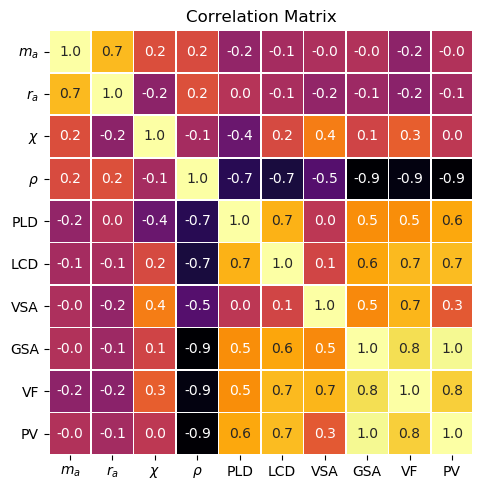

In [10]:
gas = 'Nitrogen'
X, Y = input_output(gas)
corr_mat = X.corr()
fig, ax = plt.subplots(figsize=(5, 5), dpi=100)
label = ['$m_a$', '$r_a$', r'$\chi$', r'$\rho$', 'PLD', 'LCD', 'VSA', 'GSA', 'VF', 'PV']
plot = sns.heatmap(corr_mat.T, square=True, annot=True, fmt='.1f', cbar=False, ax=ax, cmap='inferno', linewidths=.5,
                   xticklabels = label, yticklabels = label)
plot.set_yticklabels(plot.get_yticklabels(), rotation = 0)
ax.set_title('Correlation Matrix')
plt.tight_layout()

Take nitrogen as an example, we find four principle components can capture 95% variances after PCA. In addition, since we only have 124 matched MOFs for analysis, leave one out cross-validation is choosen to test the model and identify the best parameters.

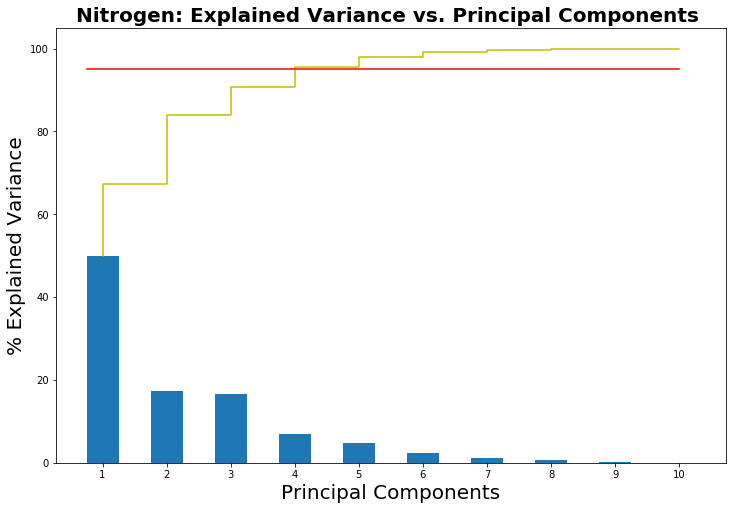

In [11]:
variance = 95
X_pca = pca(X, variance, gas, True)

### Logistic Regression for Classification of Isotherm Models:
The classification of isotherm model is implemented by logistic regression. Logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification. In this case, the classification is binary and has only two labels, Langmuir as 1 and Freundlich as 0. The logistic function or sigmoid function is shown as equation below.
\begin{equation*}
P[y=1|X] = \frac{1} {1+e^{-\theta' \cdot X}}
\end{equation*}
where $P$ is the probability of isotherm model being Langmuir, $\theta$ is the column vector of parameter including bias term, X is the feature vector, $C_{e}$ is equilibrium concentration. If $P$ is greater than 0.5 for a given MOF, its isotherm type is considered as Langmuir, otherwise it will be considered as Freundlich.

Accuracy: 41.8%
----------


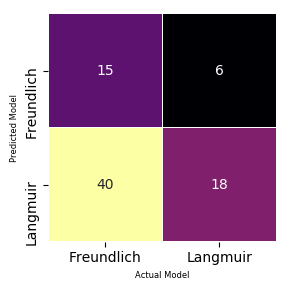

In [12]:
Y_model = Y['Model']
classification(X_pca, Y_model, LogisticRegression(C=1, class_weight='balanced'))
plt.tight_layout()

### Linear Discriminant Analysis for Classification of Isotherm Models:
Linear Discriminant Analysis(LDA) is a classifiction method similar to PCA. The key difference is that while PCA finds the axes of maximum variance for all points, LDA finds the axes of maximum variance between clusters. The accuracy and cross validation value of logistic regression are 41.8% and 24.1% respectively, while these values with LDA are 70.9% and 67.0%. Seen from the confusion matrix, although LDA has a better performance than logistic regressison, both of them are not good enough.

Accuracy: 70.9%
----------


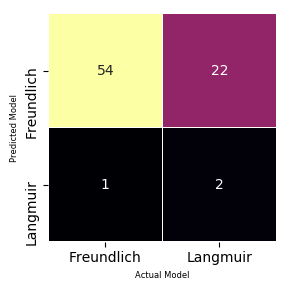

In [13]:
classification(X_pca, Y_model, LinearDiscriminantAnalysis())
plt.tight_layout()

### K-Nearest Neighbors Algorithm for Classification of Isotherm Models:
Since both linear methods are not good enough, we tried non-linear regression methods to classify the models. The first non-linear method is the k-Nearest Neighbors (kNN), which is based on a simple principle: majority voting. The advantage of majority voting is that it is nonlinear and we can distinguish classes with very complex strucutures.

CV: 82.3%
----------
Accuracy: 82.3%
----------


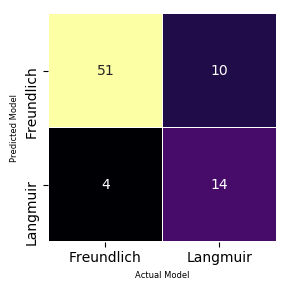

In [14]:
parameter_grid_knc = {'n_neighbors': range(2, 10)}
grid_knc = GridSearchCV(KNC(), parameter_grid_knc, scoring='accuracy', cv=LeaveOneOut())
grid_knc.fit(X_pca, Y_model)
#ps(grid_knc.best_params_)
ps('CV: {:.1f}%'.format(grid_knc.best_score_*100))
knc = grid_knc.best_estimator_
classification(X_pca, Y_model, knc)
plt.tight_layout()

Seen from results of the kNN, k eqaul to 3 is recommended and kNN gave a very high accuracy (82.3%) and a high cross-validation value (82.3%).

### Kernel Support Vector Machine with Radial Basis Fucntion for Classification of Isotherm Models:
Since kNN works well for the classification, we are also curious about other non-linear method. As we know, kernels can find non-linear boundaries with linear methods. Support vector machines (algorithms) are margin maximization classidiers. The use of kernels projects the data onto a higher dimensional space, so that "linear" decision boundaries become non-linear in the original space. The introduction of a "radial basis function" can separate the classes with a linear boundary.

CV: 75.9%
----------
Accuracy: 86.1%
----------


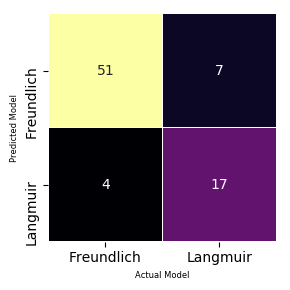

In [15]:
parameter_grid_svc = {'C': np.linspace(10, 50, 10), 
                      'gamma':np.logspace(-4, -3, 10)}
grid_svc = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), parameter_grid_svc, scoring='accuracy', cv=LeaveOneOut())
grid_svc.fit(X_pca, Y_model)
#ps(grid_svc.best_params_)
ps('CV: {:.1f}%'.format(grid_svc.best_score_*100))
svc = grid_svc.best_estimator_
classification(X_pca, Y_model, svc)
plt.tight_layout()

Hyperparameter tuning with cross-validation gives the best c and gamma values of the kernel SVC. We also gained the highest accuray (86.1%) among all these classifiers. In summary, linear classifiers (logistic regression and LDA) fails the aim, while the non-linear classifiers (kNN and kernel SVC) can classify the adsorption type well.

### Linear Regression for Isotherm Model Parameters:
Once we knew the adsorption model for each isotherm file, we can build the model to predict its corresponding adsorption parameters based on the adsorption model and structure properties.
We first use the linear regression to predict the parameters for Langmuir ($Q_0$ and $b$) and Freundlich ($K$ and $n$) model respectively. Take the linear regression of nitrogen as an example, read from the figure of its Langmuir type isotherm, the $R^2$ and CV mean relative error for $Q_0$ are 0.78 and 1.02, while for b are 0.24 and 3.02, respectively. The situation is even worse for the Freundlich type prediction. $R^2$ values are only 0.38 and 0.29 for $K$ and $n$.

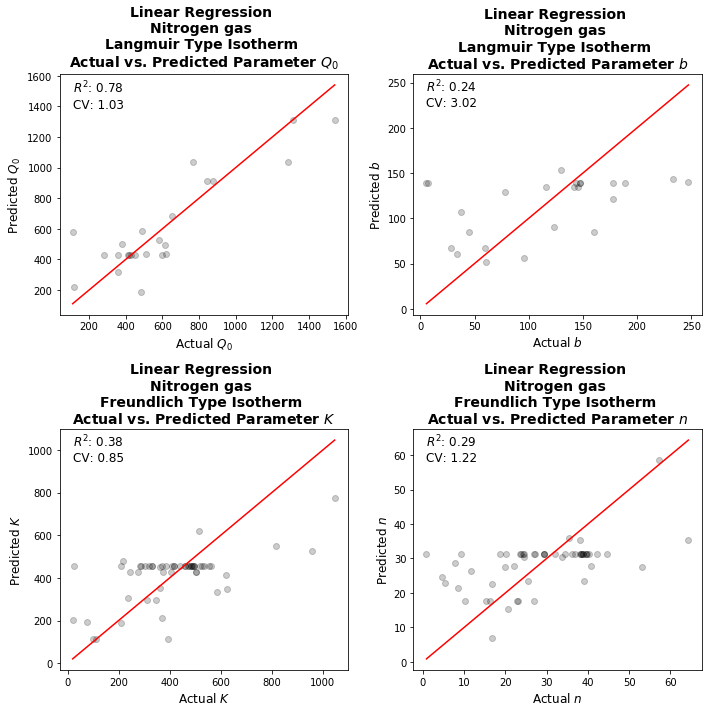

In [16]:
X_l, X_f, Y_l, Y_f = sep_model(X, Y)
X_l_pca = pca(X_l, variance, gas, False)
X_f_pca = pca(X_f, variance, gas, False)
Q0 = Y_l['Theta0']
b = Y_l['Theta1']
K = Y_f['Theta0']
n = Y_f['Theta1']

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
lr(X_l_pca, Q0, gas, 'Q_0', axes[0, 0])
lr(X_l_pca, b, gas, 'b', axes[0, 1])
lr(X_f_pca, K, gas, 'K', axes[1, 0])
lr(X_f_pca, n, gas, 'n', axes[1, 1])
plt.tight_layout()

### RBF Kernel Support Vector Regression for Isotherm Model Parameters:
So we moved to the non-linear regression algorithm, kernel support vector regression with radial basis function. After the hyperparameter tuning, we obtained better performance with the increase of all the $R^2$ values for $Q_0$, $b$, $K$, and $n$. The CV mean relative errors are also relatively smaller than the linear regresssion algorithms.

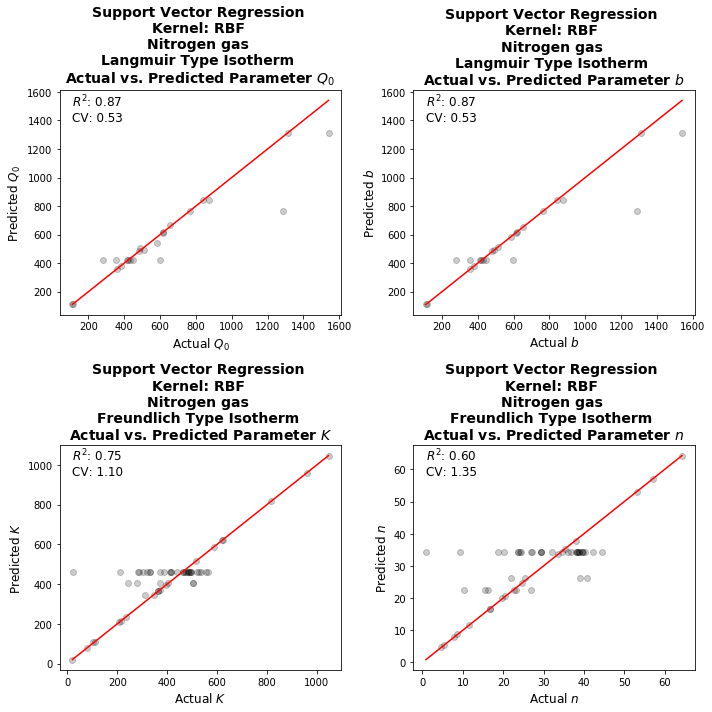

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10), )
parameter_grid_svr_Q0 = {'C': np.linspace(400, 550, 10),
                         'gamma':np.logspace(-6, -4, 10)}
parameter_grid_svr_b = {'C': np.linspace(630, 640, 10),
                         'gamma':np.logspace(-4, -3, 20)}
parameter_grid_svr_K = {'C': np.linspace(630, 640, 10),
                         'gamma':np.logspace(-2, -1, 20)}
parameter_grid_svr_n = {'C': np.linspace(440, 460, 10),
                        'gamma':np.logspace(-2, -1, 20)}
svr(X_l_pca, Q0, gas, 'Q_0', parameter_grid_svr_Q0, axes[0, 0])
svr(X_l_pca, Q0, gas, 'b', parameter_grid_svr_b, axes[0, 1])
svr(X_f_pca, K, gas, 'K', parameter_grid_svr_K, axes[1, 0])
svr(X_f_pca, n, gas, 'n', parameter_grid_svr_n, axes[1, 1])
plt.tight_layout()

## Discussion:
Based on the regression analysis, we can find Kernel SVR can predict the $Q_0$ and $K$ more accurate than $b$ and $n$. The reason is that both $Q_0$ and $K$ stand for the adsorption capacity, which is highly related to the structure properties of MOFs. However, b is the Langmuir constant, which is more dependent on chemical properties of MOFs, for example, heat of adsorption. Additionally, n is just a constant term so that it is not well-predicted.

We have to say that the NIST adsorption database is not good enough for this project. For example, it has lots of empty data points and negative pressure or adsorption. Additionally, same MOF may have different isotherm results. What's more, our trainig examples are not large enough and we only found 124 matched MOFs with available isotherms and structure properties. All of these drawbacks can bring about the inaccuracy of the prediction.

## Conclusion:
The aim of this project is to predict the adsorption model and its corresponding adsorption parameters based on the strcuture properties of Metal-Organic Frameworks (MOFs). Our first step is to assign the adsorption model for each isotherm file in the NIST database and obtain the strucutre properties of MOFs after principle component analysis from CoRE MOFs database. Then we merged two database together to build model and predict the adsorption model and its parametrs by using the machine learning algorithm. For the next phase, we first tried logistic regression, LDA, kNN, and kernel SVC to classify the adsorption model. Both of the non-linear classifiers (kNN and SVC) works well, for example, kNN has 82.3% mean accuracy and CV value. Then we tried linear regression and support vector regression with radial basis function to predict the adsorption parameters for each model. Kernel SVR works better with higher $R^2$ and lower CV mean relative error than those in the linear regression for each model. In conclusion, the result is very promising and we can obtain relative accurate prediction by using only machine learning without performing experimental measure or GCMC calculations.

In future, we want to implement some strategies to improve our prediction. First, we can add more isotherm types during the model assignment. In this project, we only used Langmuir and Freundlich models, which are not enough to represent the adsorption shape in NIST database. Second, we need to gather more matched MOFs to increase the number of training examples. Additionally, we can use more variables to describe metals and organic linkers. The most important thing is to add the chemical properties of MOFs into the feature vector, for example, the number of carbon or oxygen in the MOFs, or the special chemical interaction between the metal center with the guest adsorbate. In summary, we believe this project provides the right avenue for us to predict the adsorption type and parameters based on structure properties of MOFs by using machine learning algorithm.

## References:
* [1] Jian-Rong Li, Ryan J. Kuppler, and Hong-Cai Zhou. Selective gas adsorption and separation in metal-organic frameworks. Chem. Soc. Rev., 38:1477–1504, 2009.
* [2] S.J. Chen, Y. Fu, Y.X. Huang, Z.C. Tao, and M. Zhu. Experimental investigation of co2 sepa- ration by adsorption methods in natural gas purification. Applied Energy, 179:329 – 337, 2016.
* [3] Hong-Cai Zhou, Jeffrey R. Long, and Omar M. Yaghi. Introduction to metal–organic frame- works. Chemical Reviews, 112(2):673–674, 2012. PMID: 22280456.
* [4] Michael Fernandez, Nicholas R. Trefiak, and Tom K. Woo. Atomic property weighted ra- dial distribution functions descriptors of metal–organic frameworks for the prediction of gas uptake capacity. The Journal of Physical Chemistry C, 117(27):14095–14105, 2013.
* [5] Michael Fernandez and Amanda S. Barnard. Geometrical properties can predict co2 and n2 adsorption performance of metal–organic frameworks (mofs) at low pressure. ACS Combina- torial Science, 18(5):243–252, 2016. PMID: 27022760.
* [6] Kutay Berk Sezginel, Alper Uzun, and Seda Keskin. Multivariable linear models of structural parameters to predict methane uptake in metal–organic frameworks. Chemical Engineering Science, 124:125 – 134, 2015. Metal-Organic Frameworks for Emerging Chemical Technologies.
* [7] Maryam Pardakhti, Ehsan Moharreri, David Wanik, Steven L. Suib, and Ranjan Srivas- tava. Machine learning using combined structural and chemical descriptors for prediction of methane adsorption performance of metal organic frameworks (mofs). ACS Combinatorial Science, 19(10):640–645, 2017. PMID: 28800219.
* [8] Daniel W. Siderius, Vincent K. Shen, Russell D. Johnson III, and Roger D. van Zee. NIST/ARPA-E Database of Novel and Emerging Adsorbent Materials, volume NIST Standard Ref- erence Database Number 205. National Institute of Standards and Technology, Gaithersburg MD, 20899, (retrieved 02/16/2018).
* [9] Frank H. Allen. The Cambridge Structural Database: a quarter of a million crystal structures and rising. Acta Crystallographica Section B, 58(3 Part 1):380–388, Jun 2002.
* [10] Keng Yuen Foo and Bassim Hameed. Insights into modeling of adsorption isotherm systems. 156:2–10, 01 2010.
2